# Opdracht Machine Learning Les 3
**Datum/versie**: 7 Maart 2023

**Docent**: Annette Brons

We gaan vandaag aan de slag met de dataset over avocado’s. Deze dataset kennen jullie misschien al,
maar we gaan er vandaag nieuwe functies op toepassen en een andere waarde voorspellen.

Een deel van de code in dit notebook is al voor je geschreven, lees de vragen goed.
Als we iets over de code of resultaten vragen, kun je je antwoord in het tekstveld erbij schrijven.
Soms vragen we je ook om iets in de code te veranderen.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

Laad de data in.

In [ ]:
data = pd.read_csv('/Users/sennechin/AppliedAI/dataSets/avocado.csv')

Bekijk de data.

In [ ]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Pas de data aan zodat het bruikbaar is voor je regressie classifier.
(Vervang conventional/original voor 0/1. Verwijder date en region omdat dit strings zijn.)

In [ ]:
data['type'] = data['type'].apply(lambda t: 0 if t == 'conventional' else 1)
data = data.drop(["Date"], axis = 1)
data = data.drop(["region"], axis = 1)

data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015


Maak een train- en testset.

In [ ]:
X = data.drop('AveragePrice', axis=1)
y = data['AveragePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Vraag 1
We gaan voorspellen wat de prijs van de avocado’s is met een Decision Tree.
Bedenk of dit probleem classificatie of regressie is en zet het goede model in onderstaande code.

In [ ]:
from sklearn.linear_model import LinearRegression

model = DecisionTreeRegressor(random_state=42)
#kies hier het juiste model en gebruik random_state = 42
model.fit(X_train, y_train)

# Vraag 2
We moeten een performance measure kiezen om te laten zien hoe goed je Decision Tree model heeft gepresteerd.
Kies je voor accuraatheid of R2? Waarom?

In [77]:
score = model.score(X_test, y_test)
# schrijf hier code om de juiste performance measure te laten zien
print(score)

0.7570677704499098


# Vraag 3
Hieronder is de prestatie van het Decision Tree model visueel inzichtelijk gemaakt in een plot. Bestudeer de plot.
Vind je dat je systeem goed heeft gepresteerd op basis van deze plot?

Ja vind van wel bij hogere waarden wel een paar uitschieters.

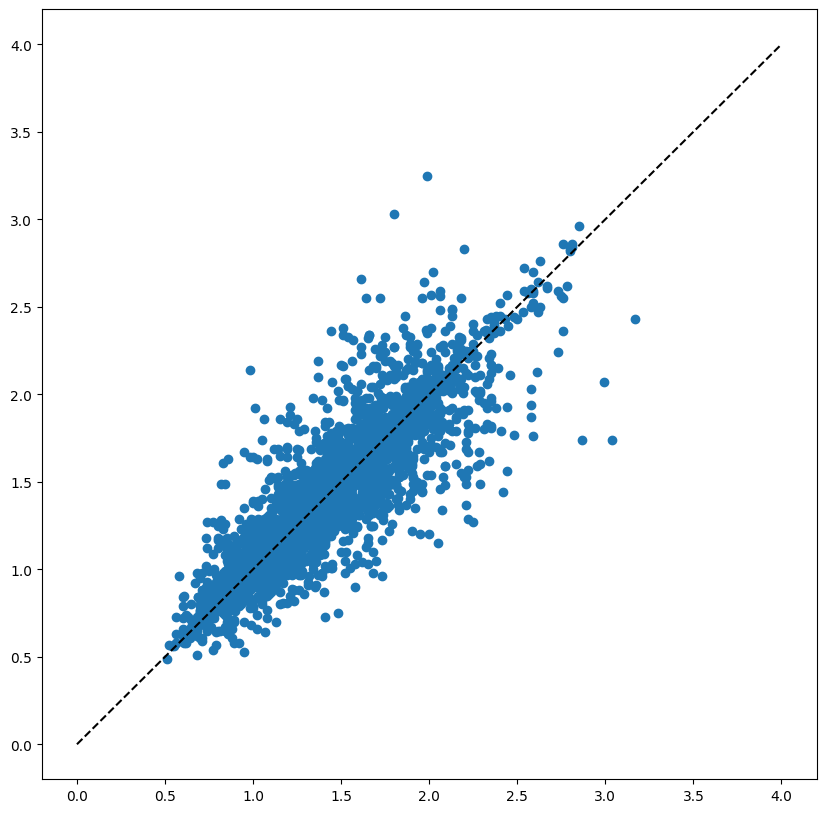

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(model.predict(X_test), y_test)
plt.plot([0,4], [0,4], '--k')

# Vraag 4
Doe 7-fold cross validation. Laat de waarden van elke 'fold' zien en bereken het gemiddelde.

In [80]:
result = cross_val_score(estimator=model,X = X_train, y = y_train, cv = 7)
print(result)
print(result.mean())

[0.73980425 0.73821162 0.71535849 0.70939127 0.71091256 0.71613204
 0.75464753]
0.7263511094820402


# Vraag 5
Pas grid searching gecombineerd met cross validation toe op je model.
Bedenk goed welke parameters je kan instellen. Laat zien welke waarden je voor deze parameters kiest en leg uit waarom.

In [81]:
from pandas.core.common import random_state

param = {
    'max_depth' : [3,10,20],
    'max_leaf_nodes': [3,10,20]
}

grid_search = GridSearchCV(estimator = model, param_grid = param, cv = 7, n_jobs = 1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [3, 10, 20],
                         'max_leaf_nodes': [3, 10, 20]})

Print de beste resultaten

In [82]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10, 'max_leaf_nodes': 20}
0.5690932317464216


# Vraag 6 (Extra)
Pas random search (i.p.v. grid search) toe met cross validation op je Decision Tree model.
Laat zien welke waarden je als minimum en maximum voor de parameters kiest en leg uit waarom.